AIM 5: ANOVA on the supplied dataset

1. Load the diabetic_data.csv dataset. 
2. Find out the unique values under the 'race' columns
    2.1. These are your distinct groups
3. Visualize the continuous variable using first histogram and the Q-Q plot
    3.1. Does it look normally distributed?
4. Since the sample size is large, use Anderson-Darling test to objectively test if the data is normally distributed 
5. Next, using boxplot, visualize the 'num_med_proc' distribution across the different categories under the 'race' column
    5.1. Based on the visuals, we would like to test if there's difference in the number of medications and procedures for different categories of races. 
    5.2. What will be the Null Hypothesis and Alternative Hypothesis?
    H0 (Null Hypothesis): ??
    Ha (Alternative Hypothesis): ??
6. Use first ANOVA to test the hypothesis
    6.1. What is the result?
7. Now use Kruskal-Wallis Test, since the data is not normally distributed
    7.1. What is the result?
8. What can you conclude from the results of the above two tests, even though the data is non-normal?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('diabetic_data.csv')

In [3]:
unique_races = df['race'].unique()
print("Unique values under the 'race' column:", unique_races)

Unique values under the 'race' column: ['Caucasian' 'AfricanAmerican' 'Other' 'Asian' 'Hispanic']


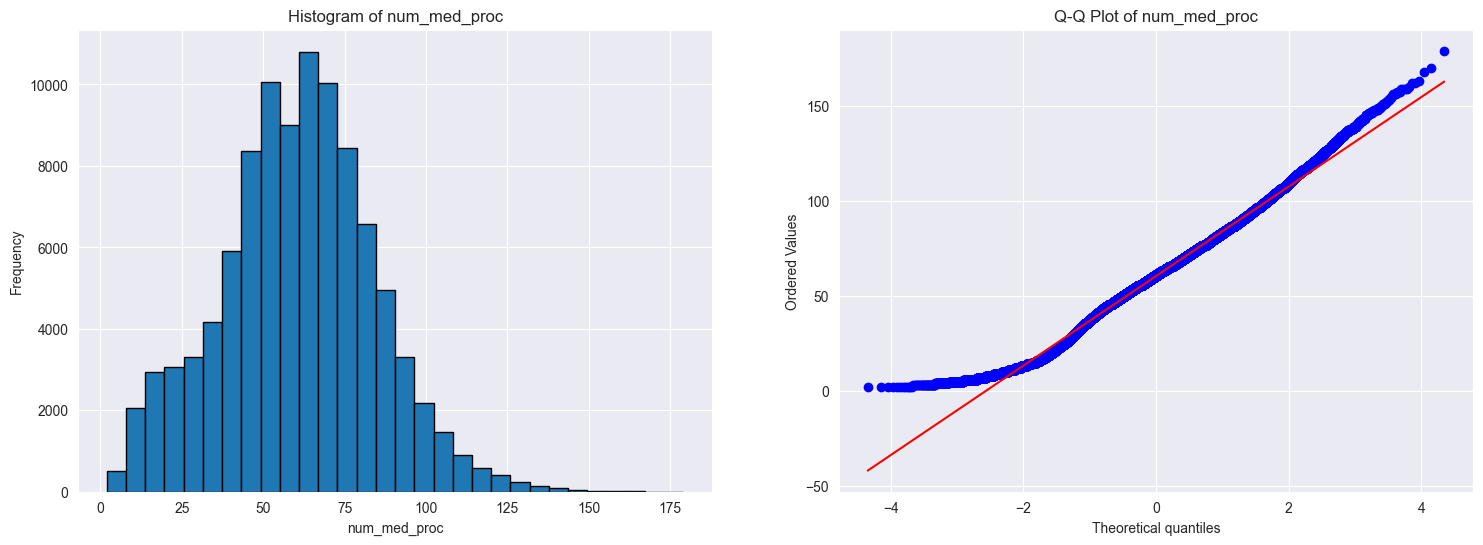

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

plt.sca(axes[0])
plt.hist(df['num_med_proc'], bins=30, edgecolor='black')
plt.title('Histogram of num_med_proc')
plt.xlabel('num_med_proc')
plt.ylabel('Frequency')

plt.sca(axes[1])
stats.probplot(x=df['num_med_proc'], dist='norm', plot=plt)
plt.title('Q-Q Plot of num_med_proc')

plt.show()

In [5]:
result = stats.anderson(df['num_med_proc'])

print(f"Anderson-Darling Test Statistic: {result.statistic}")
print("Critical Values and Significance Levels:")

for cv, sl in zip(result.critical_values, result.significance_level):
    print(f"Critical Value: {cv}, Significance Level: {sl}%")

if result.statistic < result.critical_values[2]:  # Typically using the 5% significance level
    print("The data is normal (fail to reject the null hypothesis).")
else:
    print("The data is not normal (reject the null hypothesis).")

Anderson-Darling Test Statistic: 96.61245024697564
Critical Values and Significance Levels:
Critical Value: 0.576, Significance Level: 15.0%
Critical Value: 0.656, Significance Level: 10.0%
Critical Value: 0.787, Significance Level: 5.0%
Critical Value: 0.918, Significance Level: 2.5%
Critical Value: 1.092, Significance Level: 1.0%
The data is not normal (reject the null hypothesis).


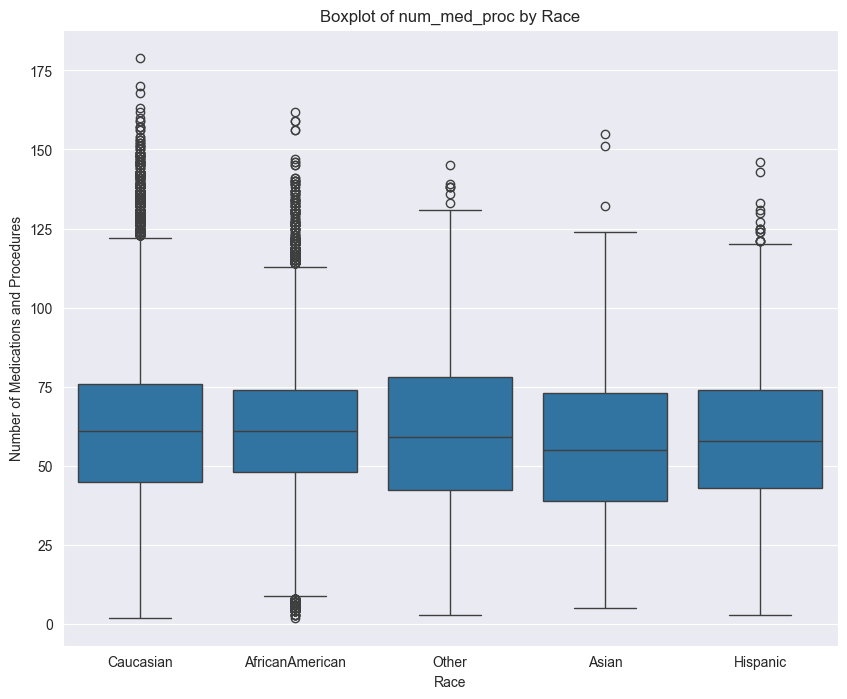

In [6]:
plt.figure(figsize=(10, 8))

sns.boxplot(x=df['race'], y=df['num_med_proc'])

plt.title('Boxplot of num_med_proc by Race')
plt.xlabel('Race')
plt.ylabel('Number of Medications and Procedures')

plt.show()

In [7]:
# Perform ANOVA
anova_result = stats.f_oneway(
    df[df['race'] == unique_races[0]]['num_med_proc'],
    df[df['race'] == unique_races[1]]['num_med_proc'],
    df[df['race'] == unique_races[2]]['num_med_proc'],
    df[df['race'] == unique_races[3]]['num_med_proc'],
    df[df['race'] == unique_races[4]]['num_med_proc']
)

print("ANOVA Result:")
print(f"F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}")

ANOVA Result:
F-statistic: 12.454717826440142, p-value: 3.962106548933667e-10


In [8]:
kruskal_result = stats.kruskal(
    df[df['race'] == unique_races[0]]['num_med_proc'],
    df[df['race'] == unique_races[1]]['num_med_proc'],
    df[df['race'] == unique_races[2]]['num_med_proc'],
    df[df['race'] == unique_races[3]]['num_med_proc'],
    df[df['race'] == unique_races[4]]['num_med_proc']
)

print("Kruskal-Wallis Test Result:")
print(f"H-statistic: {kruskal_result.statistic}, p-value: {kruskal_result.pvalue}")

Kruskal-Wallis Test Result:
H-statistic: 52.17798202426288, p-value: 1.2661582646035497e-10


In [9]:
if anova_result.pvalue < 0.05:
    print("ANOVA: There is a significant difference between the groups.")
else:
    print("ANOVA: There is no significant difference between the groups.")

if kruskal_result.pvalue < 0.05:
    print("Kruskal-Wallis: There is a significant difference between the groups.")
else:
    print("Kruskal-Wallis: There is no significant difference between the groups.")

ANOVA: There is a significant difference between the groups.
Kruskal-Wallis: There is a significant difference between the groups.
